In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#### 1. Import data into Python environment

In [2]:
df_compaints = pd.read_csv('Comcast_telecom_complaints_data.csv')

In [3]:
df_compaints.head()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone
0,250635,Comcast Cable Internet Speeds,22-04-15,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No
1,223441,Payment disappear - service got disconnected,04-08-15,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No
2,242732,Speed and Service,18-04-15,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes
4,307175,Comcast not working and no service to boot,26-05-15,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No


In [4]:
df_compaints['date_index'] = df_compaints["Date_month_year"] + " " + df_compaints["Time"]
df_compaints['date_index'] = pd.to_datetime(df_compaints['date_index'])

In [5]:
# Typecasting object to datetime format
df_compaints["Date_month_year"] = pd.to_datetime(df_compaints["Date_month_year"])

In [6]:
df_compaints = df_compaints.set_index(df_compaints["date_index"])

In [7]:
df_compaints.head()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,date_index
date_index,,,,,,,,,,,,
2015-04-22 15:53:50,250635,Comcast Cable Internet Speeds,22-04-15,2015-04-22,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,2015-04-22 15:53:50
2015-08-04 10:22:56,223441,Payment disappear - service got disconnected,04-08-15,2015-08-04,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,2015-08-04 10:22:56
2015-04-18 09:55:47,242732,Speed and Service,18-04-15,2015-04-18,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes,2015-04-18 09:55:47
2015-07-05 11:59:35,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,2015-07-05,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes,2015-07-05 11:59:35
2015-05-26 13:25:26,307175,Comcast not working and no service to boot,26-05-15,2015-05-26,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No,2015-05-26 13:25:26


#### 2. Provide the trend chart for the number of complaints at monthly granularity levels.

In [8]:
# freq = "M" = Group by Months
df_compaints.groupby(pd.Grouper(freq = "M")).size()

date_index
2015-01-31      55
2015-02-28      59
2015-03-31      45
2015-04-30     375
2015-05-31     317
2015-06-30    1046
2015-07-31      49
2015-08-31      67
2015-09-30      55
2015-10-31      53
2015-11-30      38
2015-12-31      65
Freq: M, dtype: int64

<AxesSubplot:xlabel='date_index'>

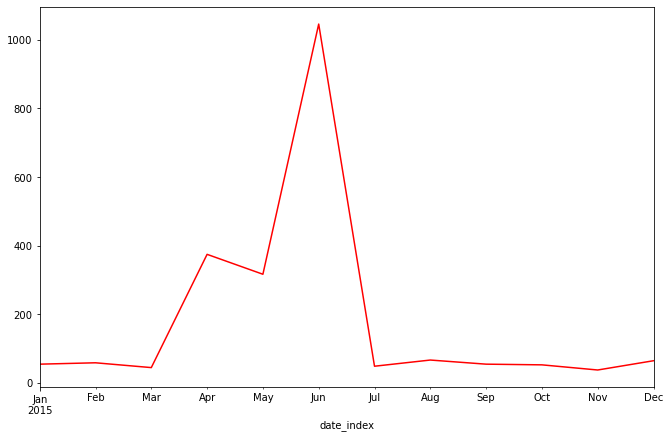

In [9]:
df_compaints.groupby(pd.Grouper(freq = "M")).size().plot(figsize = (11,7), color = 'red')

#### 2. Provide the trend chart for the number of complaints at Daily granularity levels.

In [10]:
df_compaints['Day of Month'] = pd.to_datetime(df_compaints["Date"])

In [11]:
df_compaints = df_compaints.set_index(df_compaints["Day of Month"])
df_compaints["Day of Month"].value_counts()

2015-06-24    218
2015-06-23    190
2015-06-25     98
2015-06-26     55
2015-06-30     53
             ... 
2015-05-10      7
2015-05-24      7
2015-04-05      6
2015-04-11      5
2015-05-03      5
Name: Day of Month, Length: 91, dtype: int64

<AxesSubplot:xlabel='Day of Month'>

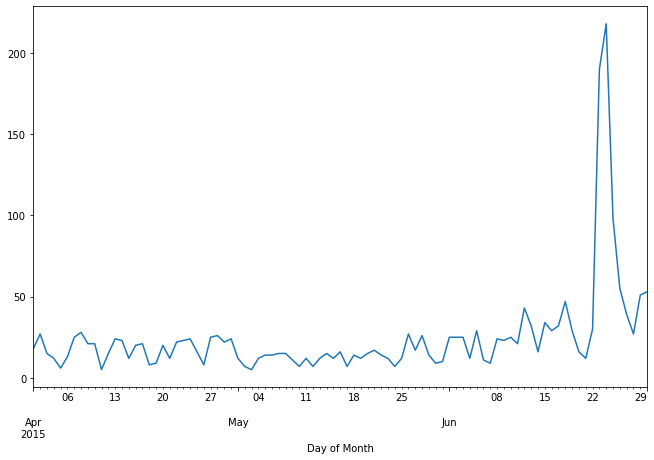

In [12]:
df_compaints.groupby(pd.Grouper(freq = "D")).size().plot(figsize = (11,7))

#### 3. Provide a table with the frequency of complaint types

In [13]:
df_compaints['Customer Complaint'].value_counts()

Comcast                                          83
Comcast Internet                                 18
Comcast Data Cap                                 17
comcast                                          13
Comcast Billing                                  11
                                                 ..
Improper Billing and non resolution of issues     1
Deceptive trade                                   1
intermittent internet                             1
Internet Speed on Wireless Connection             1
Comcast, Ypsilanti MI Internet Speed              1
Name: Customer Complaint, Length: 1841, dtype: int64

#### Python is case-sensitive it is treating Comcast, COMCAST and comcast as two different complaints.If all complaints are changed to upper case then it will give a correct count.

In [14]:
df_type = df_compaints['Customer Complaint'].str.upper().value_counts()

In [15]:
df_type.head(25)

COMCAST                             102
COMCAST DATA CAP                     30
COMCAST INTERNET                     29
COMCAST DATA CAPS                    21
COMCAST BILLING                      18
COMCAST SERVICE                      15
INTERNET SPEED                       15
UNFAIR BILLING PRACTICES             13
DATA CAPS                            13
DATA CAP                             12
COMCAST COMPLAINT                    11
COMCAST/XFINITY                      11
COMCAST INTERNET SERVICE             10
BILLING                               9
BILLING ISSUES                        8
COMCAST CABLE                         5
INTERNET                              5
COMCAST BILLING COMPLAINT             5
COMCAST ISSUES                        5
COMCAST BILLING PRACTICES             5
SERVICE ISSUES                        5
SLOW INTERNET                         5
INTERNET SERVICE                      5
COMPLAINT AGAINST COMCAST             5
COMCAST UNFAIR BILLING PRACTICES      4


In [16]:
#df_compaints[df_compaints['Customer Complaint'].str.upper() == 'COMCAST DATA CAP']['Customer Complaint'] = 'Comcast Data Caps'

#### Which complaint types are maximum i.e., around internet, network issues, or across any other domains.

4. Create a new categorical variable with value as Open and Closed. Open & Pending is to be categorized as Open and Closed & Solved is to be categorized as Closed.

In [17]:
# Open & pending Category will be categorized as open , else status is closed
df_compaints['newStatus'] = ["Open" if Status == "Open" or Status == "Pending" else "Closed" for Status in df_compaints['Status']]

In [18]:
df_compaints

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,date_index,Day of Month,newStatus
Day of Month,,,,,,,,,,,,,,
2015-04-22,250635,Comcast Cable Internet Speeds,22-04-15,2015-04-22,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,2015-04-22 15:53:50,2015-04-22,Closed
2015-04-08,223441,Payment disappear - service got disconnected,04-08-15,2015-08-04,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,2015-08-04 10:22:56,2015-04-08,Closed
2015-04-18,242732,Speed and Service,18-04-15,2015-04-18,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes,2015-04-18 09:55:47,2015-04-18,Closed
2015-05-07,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,2015-07-05,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes,2015-07-05 11:59:35,2015-05-07,Open
2015-05-26,307175,Comcast not working and no service to boot,26-05-15,2015-05-26,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No,2015-05-26 13:25:26,2015-05-26,Closed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-04-02,213550,Service Availability,04-02-15,2015-02-04,9:13:18 AM,Customer Care Call,Youngstown,Florida,32466,Closed,No,2015-02-04 09:13:18,2015-04-02,Closed
2015-06-02,318775,Comcast Monthly Billing for Returned Modem,06-02-15,2015-02-06,1:24:39 PM,Customer Care Call,Ypsilanti,Michigan,48197,Solved,No,2015-02-06 13:24:39,2015-06-02,Closed
2015-06-09,331188,complaint about comcast,06-09-15,2015-09-06,5:28:41 PM,Internet,Ypsilanti,Michigan,48197,Solved,No,2015-09-06 17:28:41,2015-06-09,Closed


#### 5. Provide state wise status of complaints in a stacked bar chart. Use the categorized variable from Q3.

In [19]:
# Unstack function will be implemented if we have more than 1 column as index
df_status = df_compaints.groupby('State').newStatus.value_counts().unstack()

In [20]:
df_status

newStatus,Closed,Open
State,,
Alabama,17.0,9.0
Arizona,14.0,6.0
Arkansas,6.0,NaN
California,159.0,61.0
Colorado,58.0,22.0
Connecticut,9.0,3.0
Delaware,8.0,4.0
District Of Columbia,14.0,2.0
District of Columbia,1.0,NaN


<AxesSubplot:xlabel='State'>

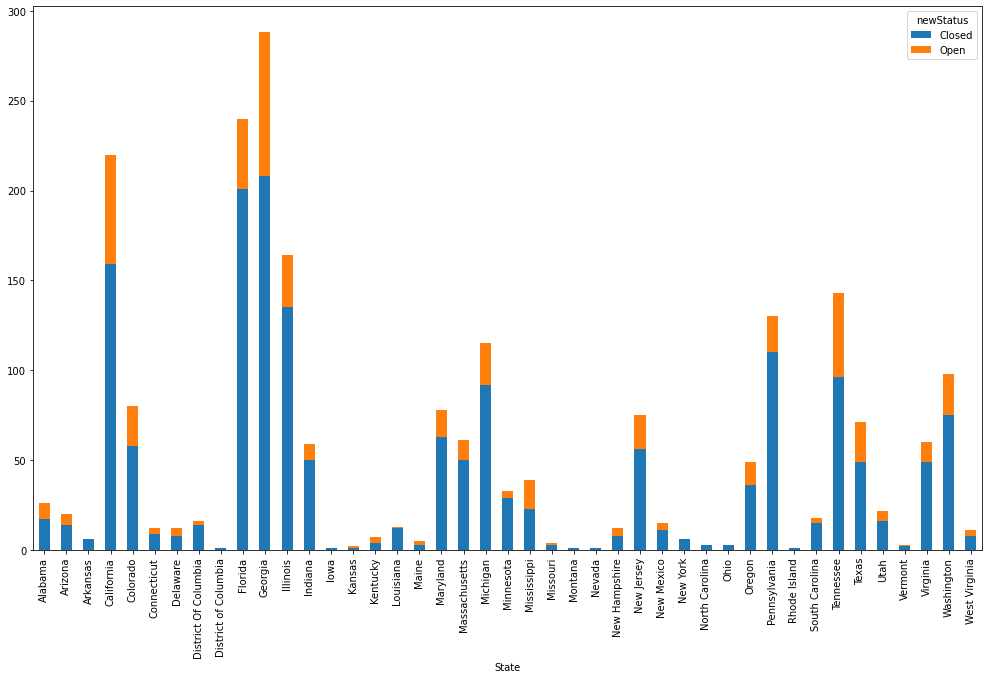

In [21]:
df_status.plot(kind = 'bar', stacked = True,figsize=(17,10))

#### 6. Which state has the maximum complaints

Georgia has maximum number of complaints

#### 7. Which state has the highest percentage of unresolved complaints

In [23]:
df_unresolved = df_compaints[df_compaints['newStatus'] == 'Open']
colors = ['#639ace','#ca6b39','#7f67ca','#5ba85f','#c360aa','#a7993f','#cc566a']
df_unresolved = df_unresolved['State'].value_counts()
df_unresolved.head(25)

Georgia          80
California       61
Tennessee        47
Florida          39
Illinois         29
Michigan         23
Washington       23
Texas            22
Colorado         22
Pennsylvania     20
New Jersey       19
Mississippi      16
Maryland         15
Oregon           13
Massachusetts    11
Virginia         11
Indiana           9
Alabama           9
Arizona           6
Utah              6
New Hampshire     4
Delaware          4
Minnesota         4
New Mexico        4
Connecticut       3
Name: State, dtype: int64

In [24]:
df_unresolved/df_compaints.shape[0]

Georgia                 0.035971
California              0.027428
Tennessee               0.021133
Florida                 0.017536
Illinois                0.013040
Michigan                0.010342
Washington              0.010342
Texas                   0.009892
Colorado                0.009892
Pennsylvania            0.008993
New Jersey              0.008543
Mississippi             0.007194
Maryland                0.006745
Oregon                  0.005845
Massachusetts           0.004946
Virginia                0.004946
Indiana                 0.004047
Alabama                 0.004047
Arizona                 0.002698
Utah                    0.002698
New Hampshire           0.001799
Delaware                0.001799
Minnesota               0.001799
New Mexico              0.001799
Connecticut             0.001349
West Virginia           0.001349
South Carolina          0.001349
Kentucky                0.001349
Maine                   0.000899
District Of Columbia    0.000899
Missouri  

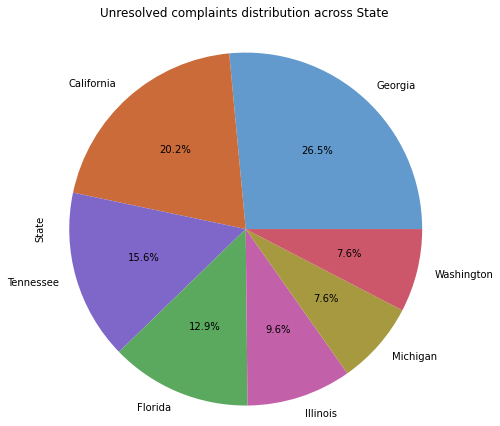

In [25]:
df_unresolved.head(7).plot(kind='pie',autopct='%1.1f%%',
                        figsize = (7,7), colors = colors)
plt.axis('equal')
plt.title('Unresolved complaints distribution across State\n')
plt.show()

#### Georgia has maximum percentage of unresolved complaints

#### 8. Provide the percentage of complaints resolved till date, which were received through the Internet and customer care calls.

In [26]:
df_received = df_compaints[df_compaints['Received Via'].isin(['Internet','Customer Care Call'])]

In [27]:
df_received.newStatus.value_counts()

Closed    1707
Open       517
Name: newStatus, dtype: int64

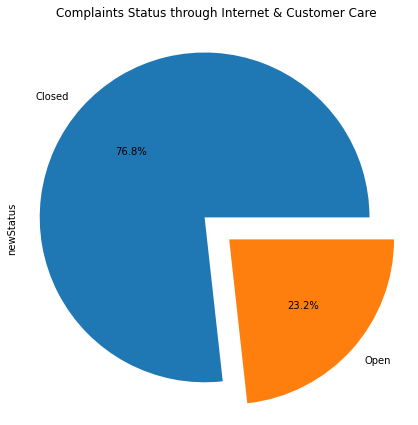

In [28]:
df_received.newStatus.value_counts().plot(kind='pie',autopct='%1.1f%%',
                        figsize = (7,7), explode = (0,0.2))
plt.axis('equal')
plt.title('Complaints Status through Internet & Customer Care\n')
plt.show()